<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


# Accepted Loans

In this section we explore and analyze data about accepted loans since 2007 till 2018. 

We will work with data previously cleaned and augmented with census information. Data cleaning and is in a separate notebook under the Data webpage.

In [2]:
df_loan_accepted_cleaned = pd.read_csv('https://s3.amazonaws.com/ruxton.ai/df_loan_accepted_census_cleaned.csv')

A great deal of our EDA has been devoted to understanding the principal features and, even more importantly, which ones can be used for prediction and which ones cannot because their information is updated after the loan is funded. First we examined few relevant features (univariate analysis) and then continued to look at correlations and other visualizations.

## All Loans

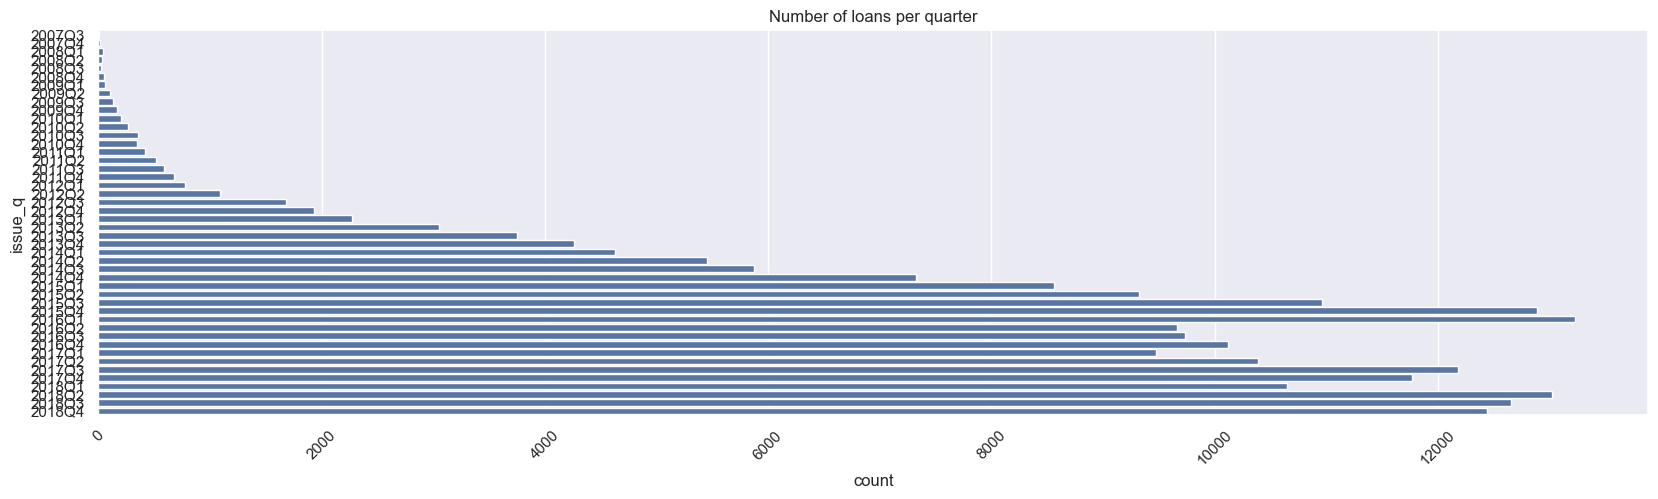

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
sns.countplot(df_loan_accepted_cleaned.issue_q.sort_values(ascending=True), ax=ax)
plt.title('Number of loans per quarter')
plt.xticks(rotation=45);

As shown below, majority of the loans have been "Fully paid". Many of them are current and few have been charged-off. We can also observed a very few amount of default and late loans.

In [4]:
df_loan_accepted_cleaned.tail(10)

Unnamed: 0         id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
223133      223133   73746257      19175        19175            19175    60   
223134      223134   65794319       5000         5000             5000    36   
223135      223135   68605904      29650        29650            29650    36   
223136      223136   76688417      20575        20575            20575    60   
223137      223137   96556633      21000        21000            21000    60   
223138      223138   64958722      15000        15000            15000    60   
223139      223139  125293878      21000        21000            21000    36   
223140      223140   83758948       5000         5000             5000    36   
223141      223141   58662388      16800        16800            16800    60   
223142      223142  104899164      35000        35000            35000    60   

        int_rate  installment grade sub_grade  ...  male_pct  female_pct  \
223133     24.99       562.70     F        F3  ...  0.516569    0.483431   
223134     27.88       206.50     G        G3  ...  0.516569    0.483431   
223135     19.89      1100.24     E        E3  ...  0.516569    0.483431   
223136     18.25       525.28     D        D3  ...  0.516569    0.483431   
223137      8.24       428.23     B        B1  ...  0.516569    0.483431   
223138     25.99       449.02     F        F5  ...  0.516569    0.483431   
223139     12.62       703.74     C        C1  ...  0.517533    0.482467   
223140     10.49       162.49     B        B3  ...  0.501646    0.498354   
223141     17.86       425.34     D        D5  ...  0.504194    0.495806   
223142     11.49       769.57     B        B5  ...  0.497848    0.502152   

       Black_pct  Native_pct Asian_pct Hispanic_pct household_family_pct  \
223133  0.001598    0.175357  0.001405     0.014520             0.666573   
223134  0.001598    0.175357  0.001405     0.014520             0.666573   
223135  0.001598    0.175357  0.001405     0.014520             0.666573   
223136  0.001598    0.175357  0.001405     0.014520             0.666573   
223137  0.001598    0.175357  0.001405     0.014520             0.666573   
223138  0.001598    0.175357  0.001405     0.014520             0.666573   
223139  0.132475    0.002751  0.017903     0.081492             0.515529   
223140  0.004093    0.001913  0.007053     0.020714             0.684689   
223141  0.006137    0.001839  0.004168     0.037268             0.653617   
223142  0.007174    0.010043  0.060258     0.073171             0.000000   

       poverty_level_below_pct Graduate_Degree_pct employment_2016_rate  
223133                0.033217            0.040915             0.776422  
223134                0.033217            0.040915             0.776422  
223135                0.033217            0.040915             0.776422  
223136                0.033217            0.040915             0.776422  
223137                0.033217            0.040915             0.776422  
223138                0.033217            0.040915             0.776422  
223139                0.341846            0.093430             0.817412  
223140                0.110435            0.058491             0.805492  
223141                0.201557            0.041698             0.801255  
223142                0.400000            0.156812             1.000000  

[10 rows x 110 columns]

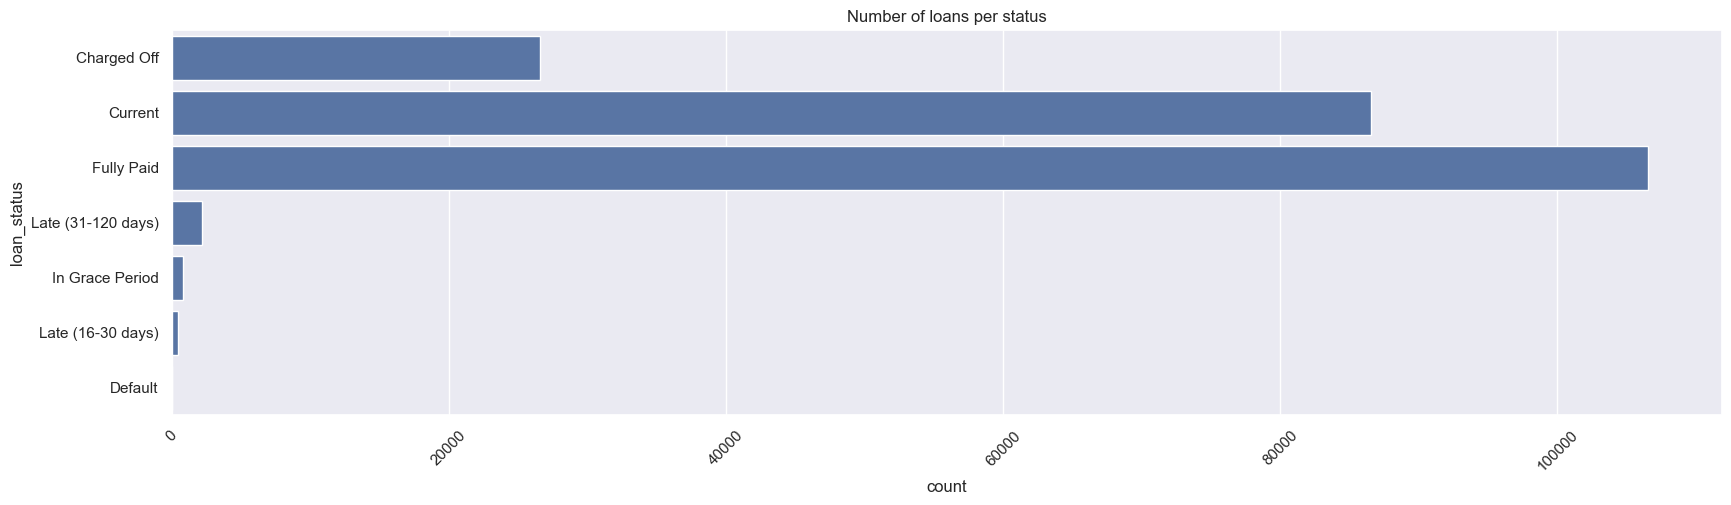

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,5)) # just formatting 
sns.countplot(df_loan_accepted_cleaned.loan_status, ax=ax)
plt.title('Number of loans per status')
plt.xticks(rotation=45);


Feature “Grade” and “subgrade” classify the various loans into high risk and high profit categories. This feature is very useful for to design an investment strategy. Grade A is the one that is funded a lot with minimal percent of default. In the increasing order of default is Grade FG is least funded and has highest loan amount charged off.  Below is a count plot of the number of loans per grade and subgrade.

As depicted below, most loans are 36-months term with interest rate around 12%, which correspond to grades B and C. There are few outliers with very high interest rates, which we will need to carefully consider during modelling. The inbalanced terms and grades should also be considered with care.

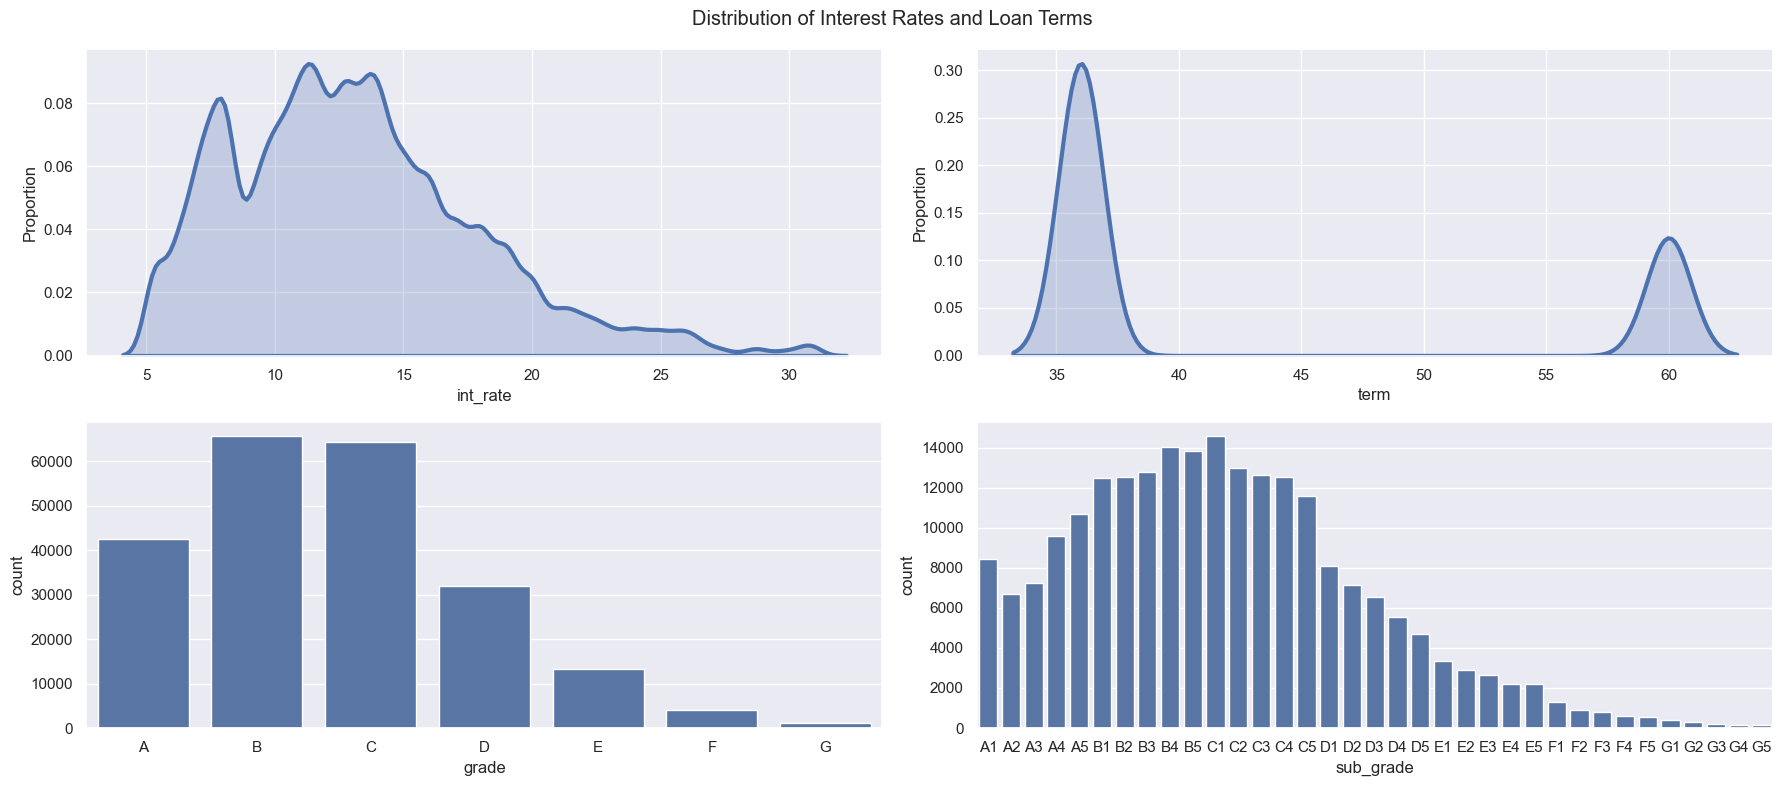

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(18, 8))  # Layout for 4 plots

# KDE plots using updated seaborn syntax
sns.kdeplot(data=df_loan_accepted_cleaned, x='int_rate', fill=True, linewidth=3, ax=ax[0][0])
sns.kdeplot(data=df_loan_accepted_cleaned, x='term', fill=True, linewidth=3, ax=ax[0][1])

# Count plots
sns.countplot(data=df_loan_accepted_cleaned, x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=ax[1][0])
sns.countplot(data=df_loan_accepted_cleaned, x='sub_grade', order=np.sort(df_loan_accepted_cleaned.sub_grade.unique()), ax=ax[1][1])

# Axis labels and titles
ax[0][0].set_ylabel('Proportion')
ax[0][1].set_ylabel('Proportion')
plt.suptitle('Distribution of Interest Rates and Loan Terms')
plt.tight_layout()


As we can see in the plots below, `loan_amnt`, `funded_amnt` and `funded_amnt_inv` have almost the same values distribution. It is safe to keep one of those variables.The listed amount of loan applied by the borrower `loan_amnt` is highly correlated with the total amount committed to that loan `funded_amnt` as well as with the total amount committed by investors `funded_amnt_inv`.

We can closely consider `funded_amnt_inv` because it makes more sense for our project goal which is to advise an investor about the best investment strategy with compliance to fairness.

We also plot the distribution of monthly installments, which follows a similar distribution as loan amounts, as expected.

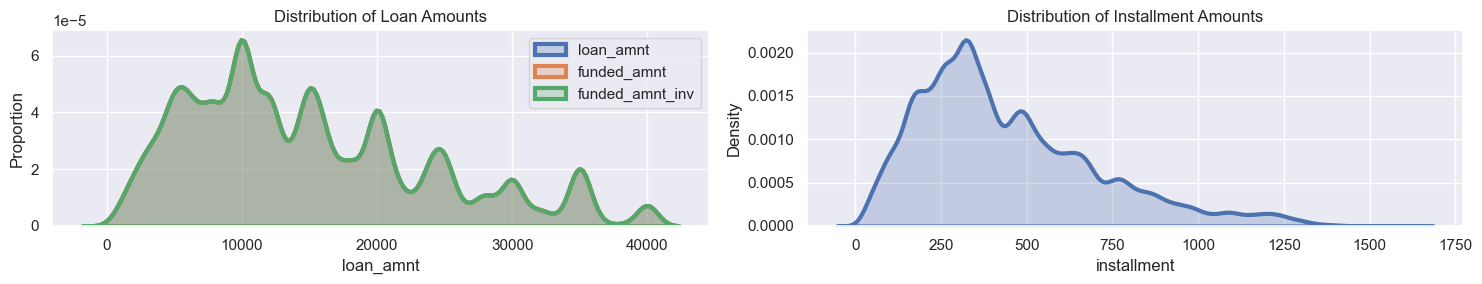

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))

# KDE plots on the left axis
sns.kdeplot(data=df_loan_accepted_cleaned, x='loan_amnt', fill=True, linewidth=3, label='loan_amnt', ax=ax[0])
sns.kdeplot(data=df_loan_accepted_cleaned, x='funded_amnt', fill=True, linewidth=3, label='funded_amnt', ax=ax[0])
sns.kdeplot(data=df_loan_accepted_cleaned, x='funded_amnt_inv', fill=True, linewidth=3, label='funded_amnt_inv', ax=ax[0])

# KDE plot on the right axis
sns.kdeplot(data=df_loan_accepted_cleaned, x='installment', fill=True, linewidth=3, label='installment', ax=ax[1])

# Labels and titles
ax[0].set_ylabel('Proportion')
ax[0].set_title('Distribution of Loan Amounts')
ax[0].legend()

ax[1].set_title('Distribution of Installment Amounts')

plt.tight_layout()
plt.show()


The figure below shows that debt consolidation is the first major purpose and credit card payments is the second major purposes of lending. Most people tend to borrow some money because they previously borrow some. There could be an increase in probability of being "charged off" in this case, which we will investigate in our models.

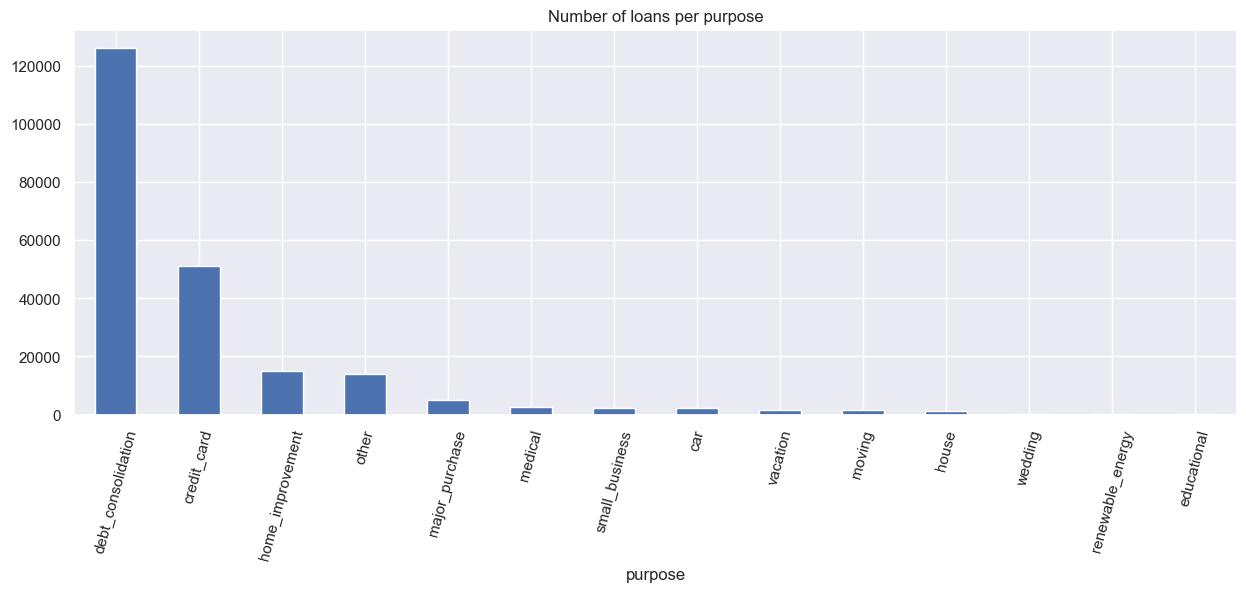

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
df_loan_accepted_cleaned.purpose.value_counts().plot(kind="bar", ax=ax)
plt.title('Number of loans per purpose')
plt.xticks(rotation=75);

## Paid vs Unpaid Loans

In this section we will have a look at historical loans which were **fully paid** or **charged-off**. Current loans, late or defaulted loans are excluded from this analysis.  

In [12]:
df_loan_for_plot = df_loan_accepted_cleaned.copy()
df_loan_for_plot = df_loan_for_plot[df_loan_for_plot.success.isin([0,1])]

**Violin plot for Funded amount and interest rate class**

Below plot we notice that most of these grade have equally paid and unpaid amount when the amount is below a threshold, while for higher valued loan, the grade plays a critical role if the borrower would charge-off.

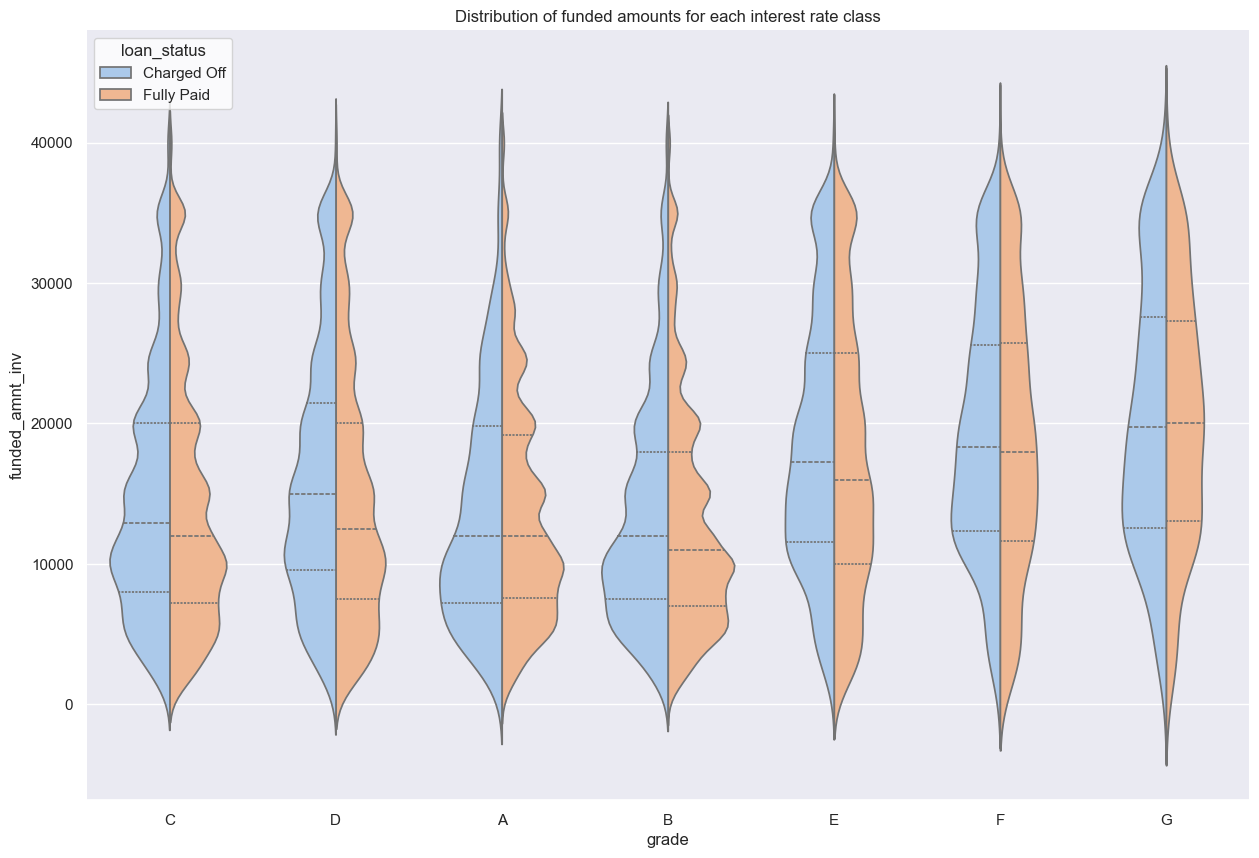

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="grade", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart",
               data=df_loan_for_plot, ax=ax)
sns.despine(left=True)
ax.set_title('Distribution of funded amounts for each interest rate class');

## Violin plot for fico score low and funded amount ##

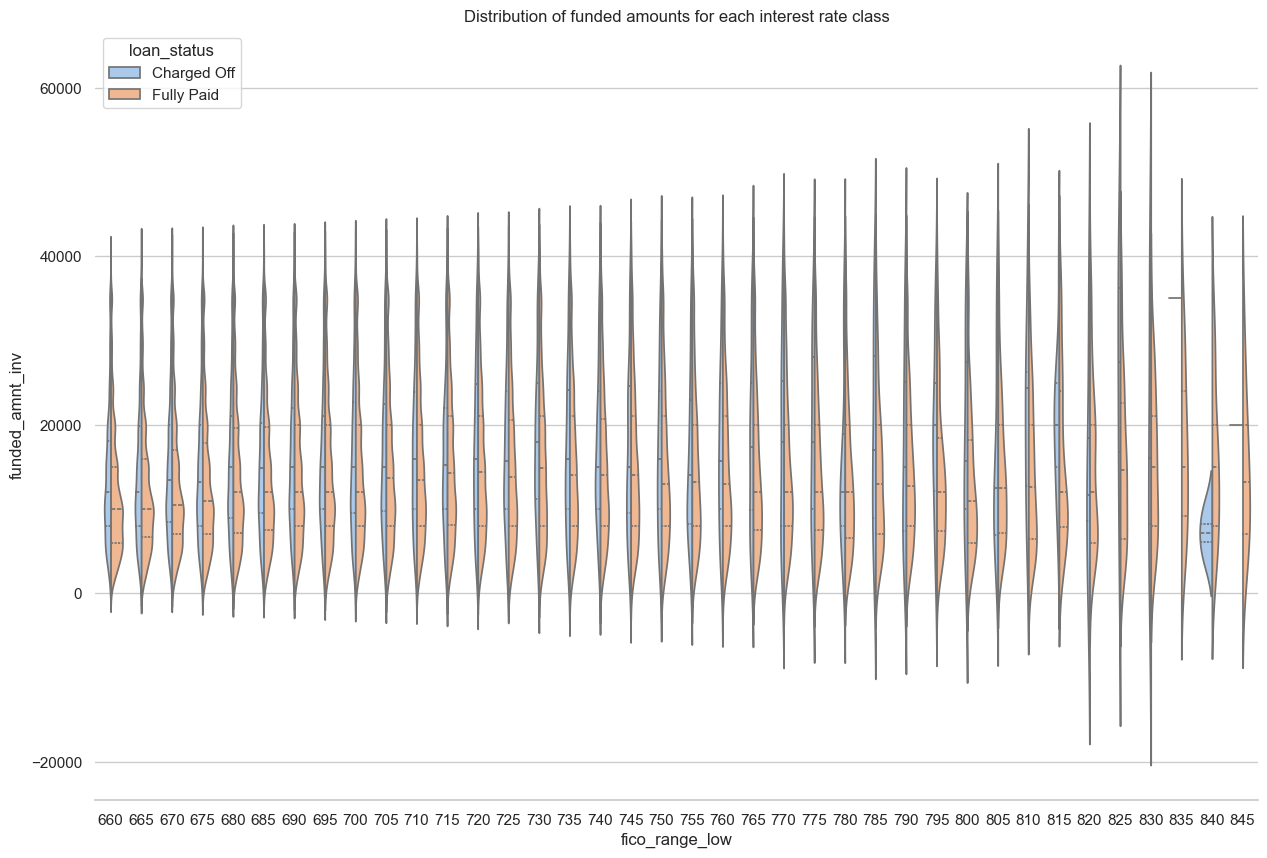

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="fico_range_low", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart",
               data=df_loan_for_plot, ax=ax)
sns.despine(left=True)
ax.set_title('Distribution of funded amounts for each interest rate class');

## Your code here : Draw a violin plot for another potential predictor combination. ##

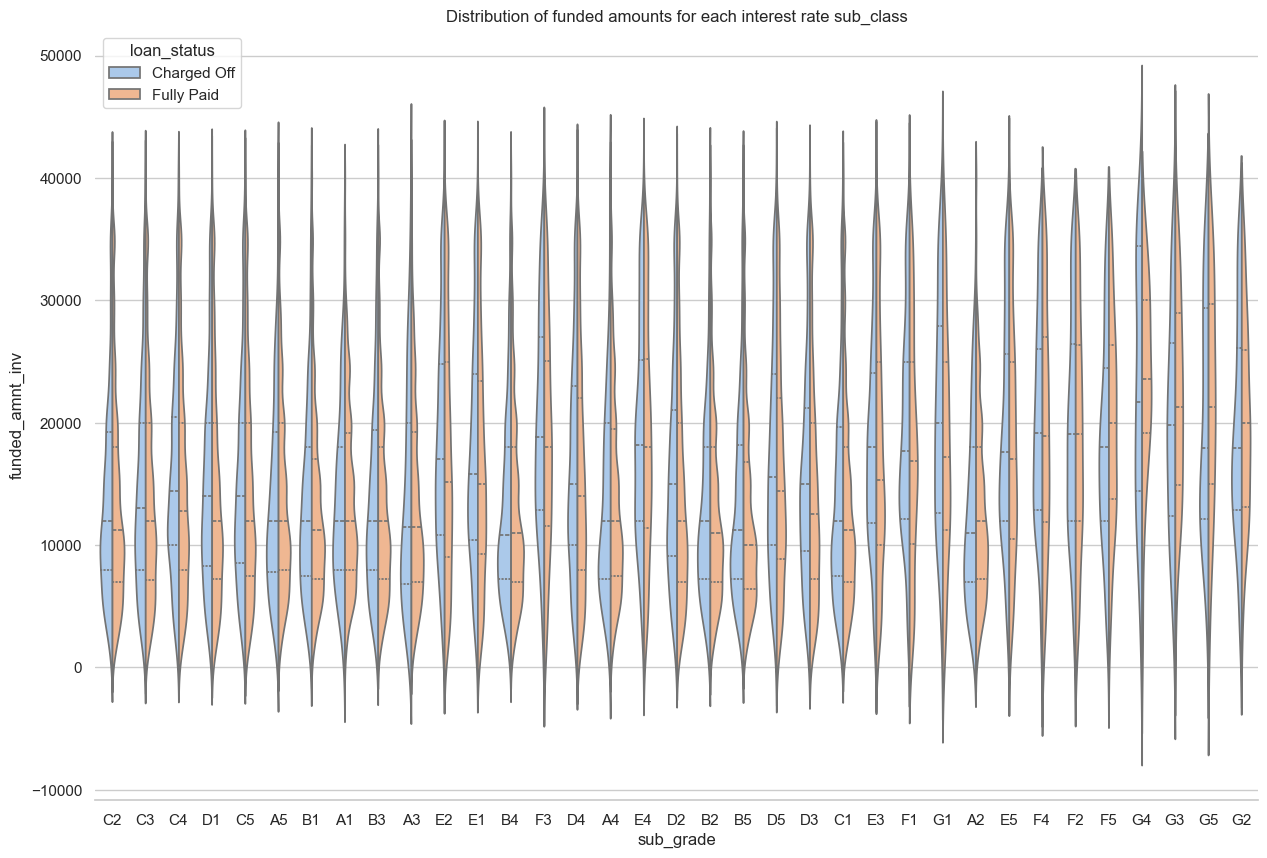

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="sub_grade", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart",
               data=df_loan_for_plot, ax=ax)
sns.despine(left=True)
ax.set_title('Distribution of funded amounts for each interest rate sub_class');

**Purpose and Term**

The plot below shows that debt consolidation and credit card payments are the major purposes of lending. Most people tend to borrow some money because they previously borrow some.  The purpose is however not related to the likelihood of default in loan payment. 36 months is the most common term.

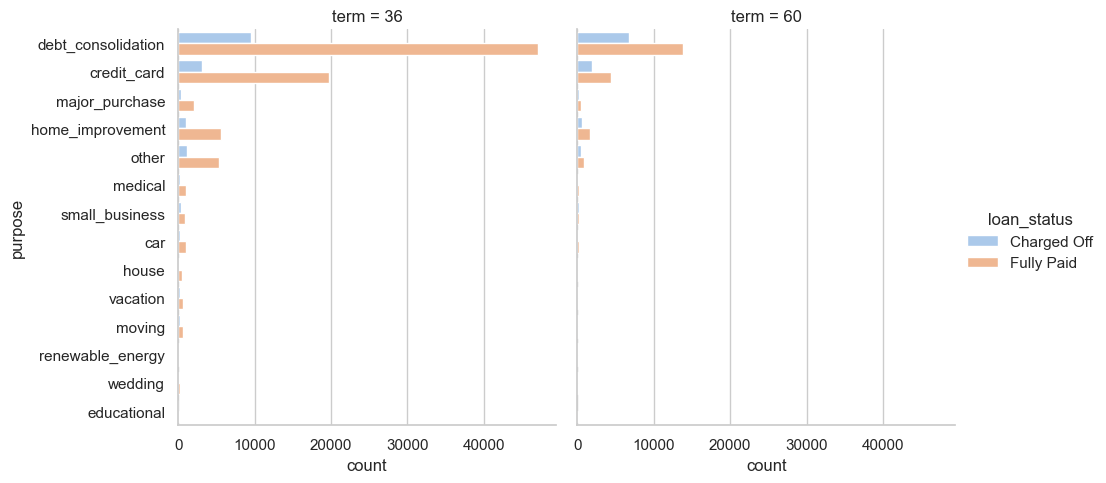

In [16]:
sns.catplot(kind='count', data=df_loan_for_plot, y='purpose', hue='loan_status', col='term');

**Home ownership and employment length**

Below we explore how home ownership and employment length affects the loan outcome for each term (36 or 60 months).

Text(0.5, 1.0, 'Effect of Home Ownership and Employment Length on Loan Status')

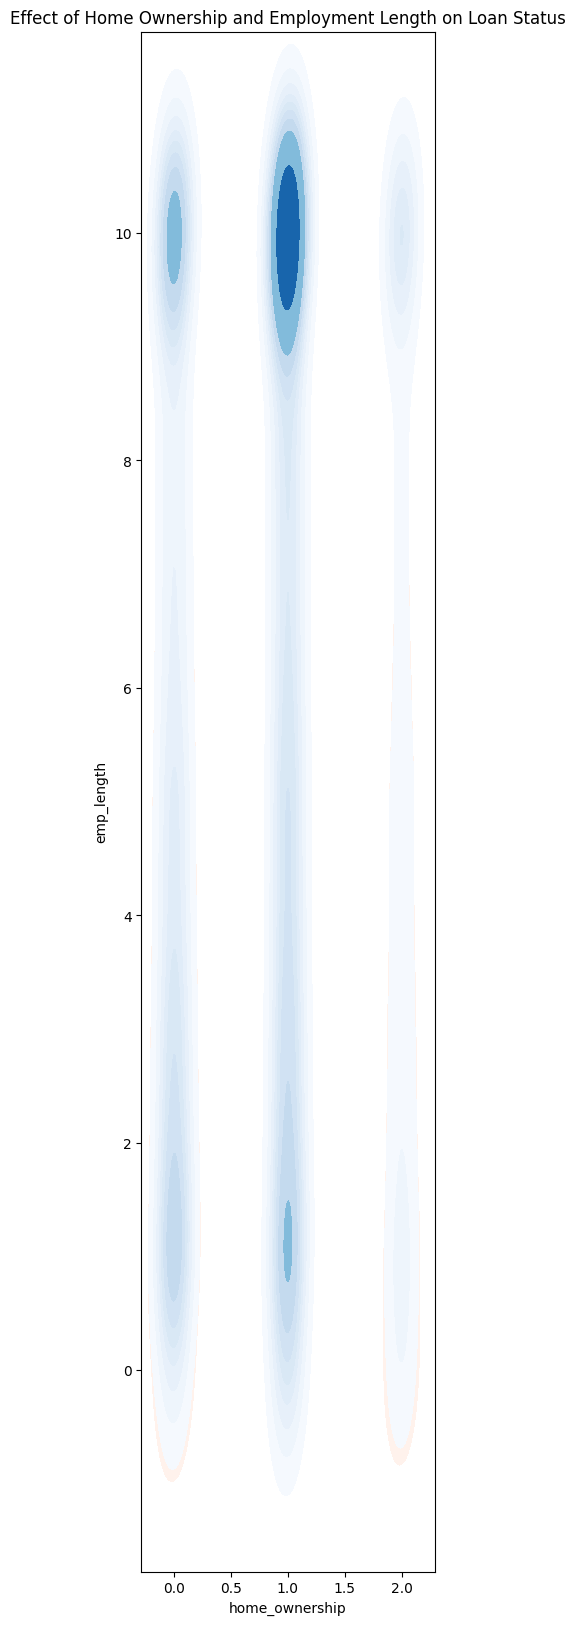

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Example: load from a CSV
df_loan_for_plot = pd.read_csv('https://s3.amazonaws.com/ruxton.ai/df_loan_accepted_census_cleaned.csv')

f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_aspect("equal")

term36 = df_loan_for_plot[df_loan_for_plot.term == 36]\
    .replace({'home_ownership': {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3, 'ANY': 4, 'NONE': 5}})\
    .infer_objects(copy=False)

term60 = df_loan_for_plot[df_loan_for_plot.term == 60]\
    .replace({'home_ownership': {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3, 'ANY': 4, 'NONE': 5}})\
    .infer_objects(copy=False)

term36 = term36[term36.home_ownership.isin([0, 1, 2])]
term60 = term60[term60.home_ownership.isin([0, 1, 2])]

sns.kdeplot(x=term36.home_ownership, y=term36.emp_length,
            cmap="Reds", fill=True, ax=ax)
sns.kdeplot(x=term60.home_ownership, y=term60.emp_length,
            cmap="Blues", fill=True, ax=ax)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.set_title('Effect of Home Ownership and Employment Length on Loan Status')




**Debt-to-income ratio**

Looking at the plot there is no increasing relationship between the interest rate and the debt-to-income ratio. The charged-off loans are almost equally distributed along the debt-to-income ratio axis and interest rate axis. It could be interesting to investigate whether the likelihood of charged-off is mainly guided by both features.

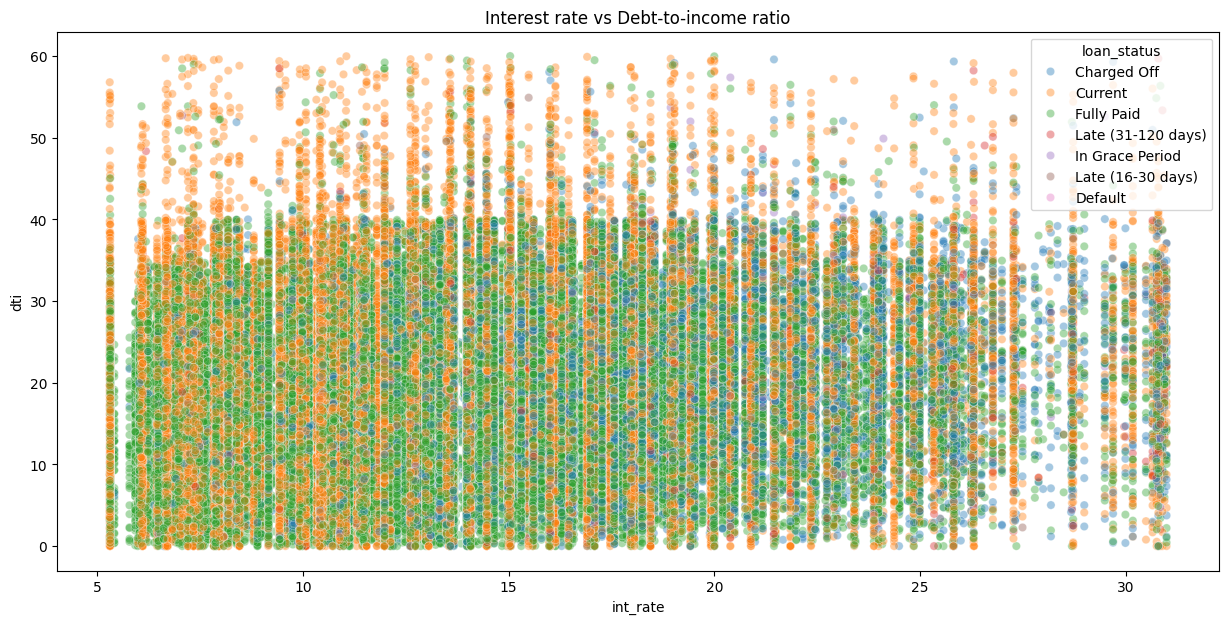

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.dti<60], x='int_rate', y='dti', hue='loan_status', alpha=.4, ax=ax)
ax.set_title('Interest rate vs Debt-to-income ratio');

**Revolving bankcards**

The total amount open on revolving bankcards seems not to affect the amount that people will borrow and the likelihood that they will not be able to pay.

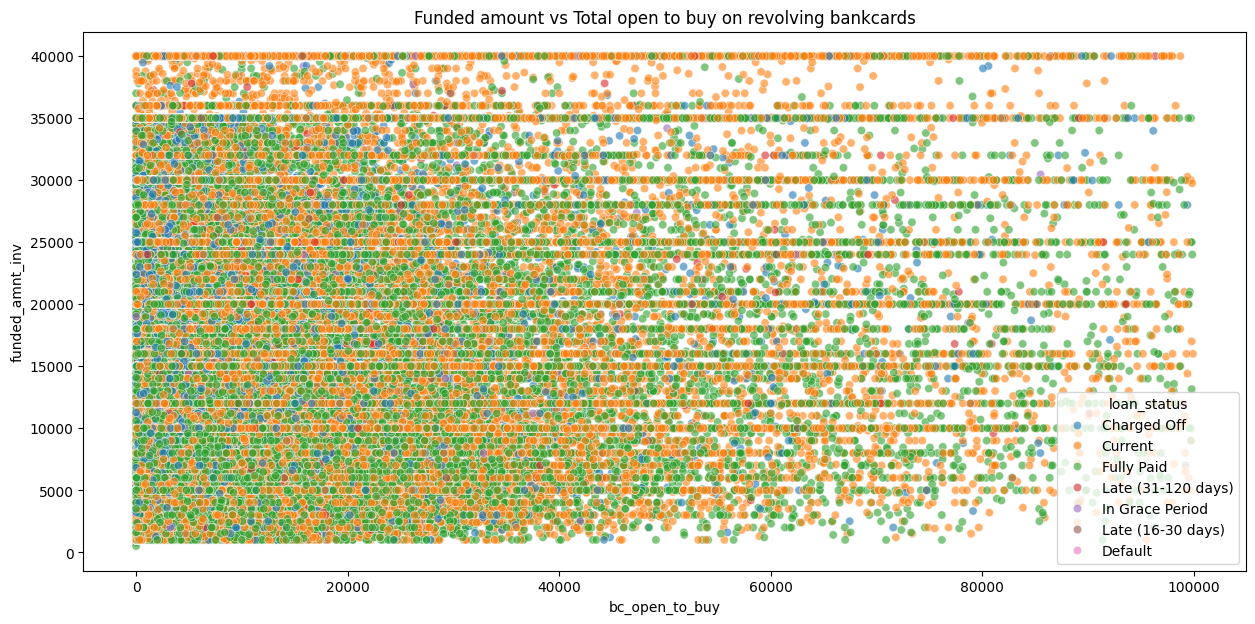

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.bc_open_to_buy<100000], x='bc_open_to_buy', y='funded_amnt_inv', hue='loan_status', alpha=.6,ax=ax)
ax.set_title('Funded amount vs Total open to buy on revolving bankcards');

**Credit limit and current balance**

The likelihood of not being debt is probably not dependend on the credit limit of the borrower. People with very high credit limit probably default the same rate as those with low credit limit.

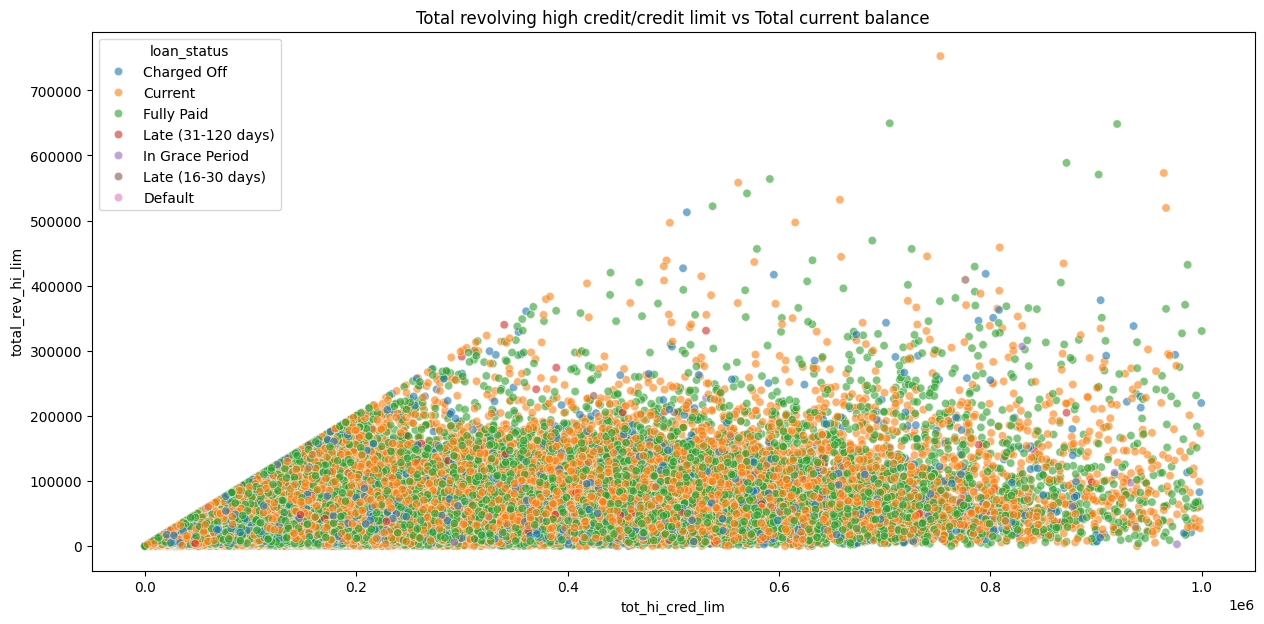

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.tot_hi_cred_lim<1000000], x='tot_hi_cred_lim', y='total_rev_hi_lim', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Total revolving high credit/credit limit vs Total current balance');

## Your code here : Perform EDA for interest vs tot_hi_cred_limit and draw the plot## 

Text(0.5, 1.0, 'Interest rate VS Total high credit limit')

C:\Users\ianka\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


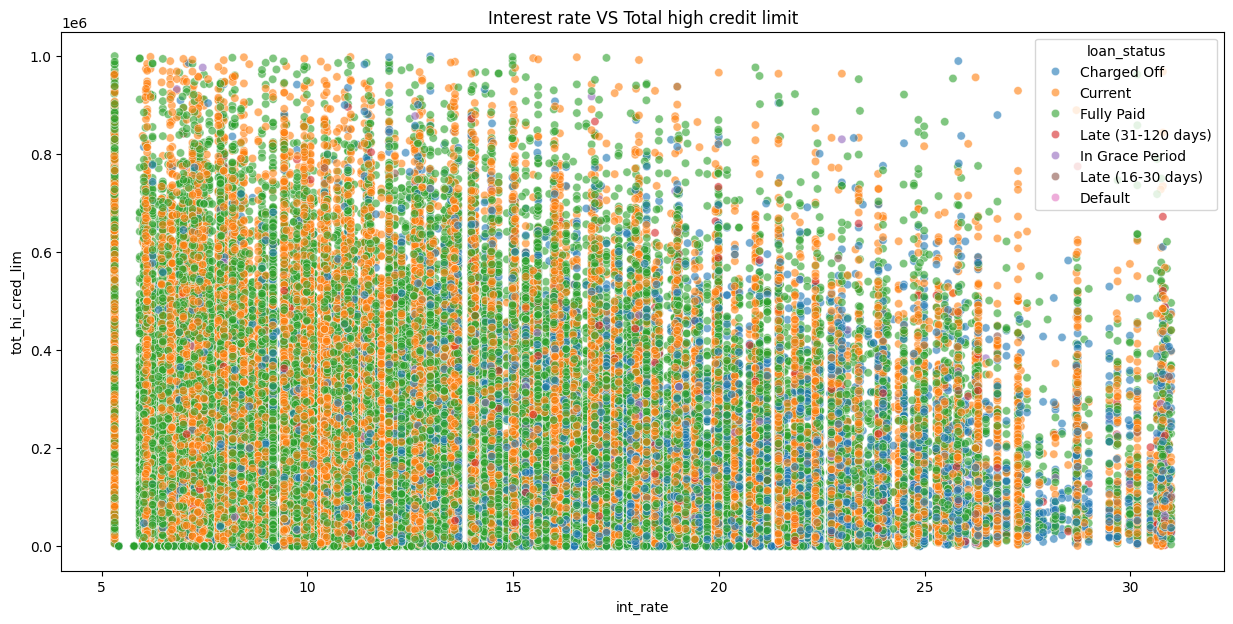

In [9]:
## Your code here ##
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.tot_hi_cred_lim<1000000],x='int_rate', y='tot_hi_cred_lim',  hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Interest rate VS Total high credit limit')

**Annual income and loan amount**

LendingClub seems to allow loan amounts at most the half of annual income of the borrower. High loan amount combined with low income look like a precursor of charge-off. Most failed loans are located in that area. Looking at very high income borrower we can still see a lot of failed loans, suggesting that investors should not only look at income.

C:\Users\ianka\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ianka\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


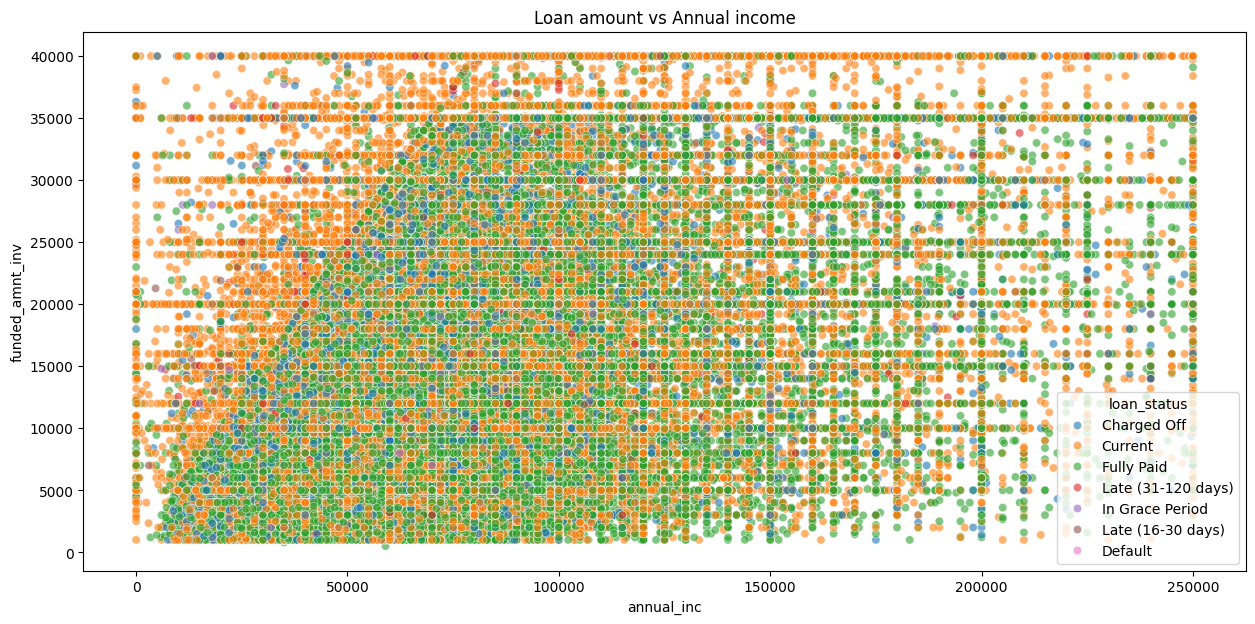

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.annual_inc<500000], x='annual_inc', y='funded_amnt_inv', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Loan amount vs Annual income');

**Credit limit and current balance**

Assuming that the `Total current balance` provided in the dataset was measured at the date when the loan was closed, we can say that the amount of money borrowers do have on their bank accounts does not say much about their ability to pay their loan on time.

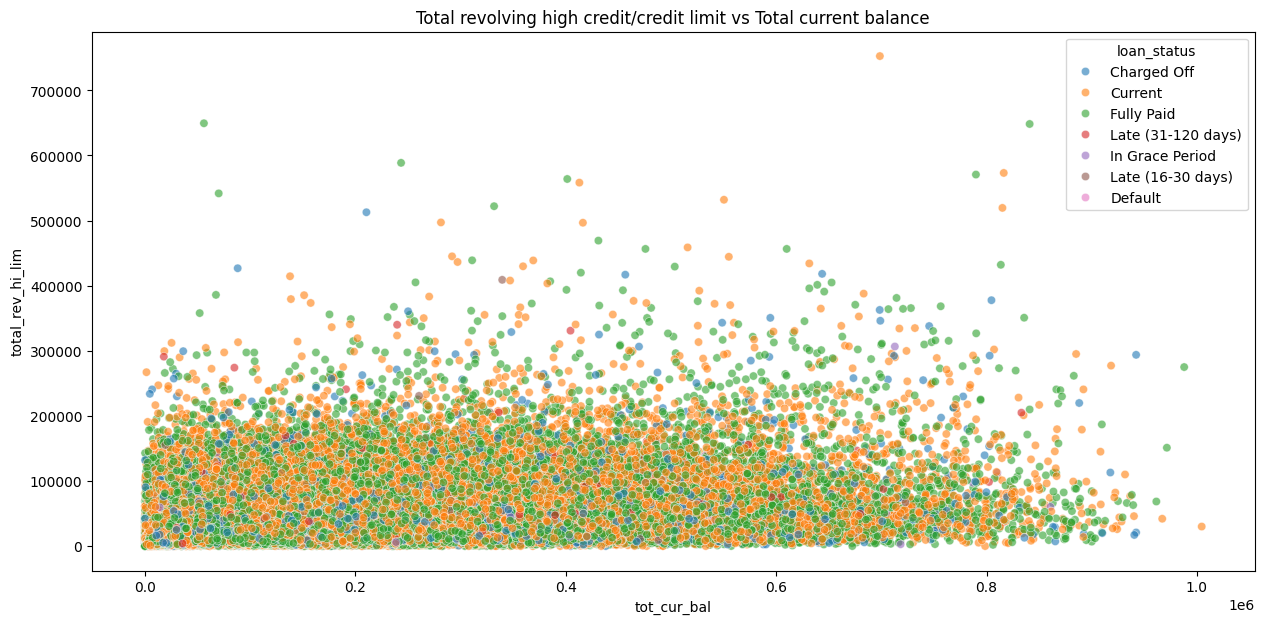

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.scatterplot(data=df_loan_for_plot[df_loan_for_plot.tot_hi_cred_lim<1000000], x='tot_cur_bal', y='total_rev_hi_lim', hue='loan_status', alpha=.6, ax=ax)
ax.set_title('Total revolving high credit/credit limit vs Total current balance');